# Solving the 1-D Eigenvalue Equation  
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi = E \psi $$  
## Reduction to dimensionless form  
 Assume natural length scale $a_0$. Let $x=a_0 y$. Substituting gives  
 $$ -\frac{\hbar^2}{2ma_0^2} \frac{d^2\psi}{dy^2} + V(x)\psi = E \psi $$  
 Use $E_0 = \hbar^2/2ma_0^2$ as a natural energy scale. Dividing throughout by $E_0$ gives  
  $$ -\frac{d^2\psi}{dy^2} + U(y)\psi = \epsilon \psi $$  
  where $U(y)=V(a_0 y)/E_0$ and $\epsilon=E/E_0$. The wavefunction satisfies the constraint  
  $$ \int dx |\psi|^2 = 1 $$.  
  We define a dimensionless wavefunction $\phi = \sqrt{a_0}\times \psi$. This 
  satisfies  
  $$ \int dy |\phi|^2 = 1 $$.
  
## Discretization  
We assume that $x \in [-L,L]$. Then, $y \in [-\tilde{L},\tilde{L}]$ where $\tilde{L}=L/l_0$.  
Divide the interval $[-\tilde{L},\tilde{L}]$ into $N$ segments with lattice points labelled by an 
integer $i$ such that $y_i = i\times \Delta$ where $\Delta = 2\tilde{L}/N$. Using the symmetric difference for the 
second derivative in the eigenvalue equation gives (at $y_i$)  
$$-\frac{1}{\Delta^2}\left(\phi_{i+1}-2\phi_i+\phi_{i-1}\right) + U_i \phi_i = \epsilon \phi_i $$  
This equation can be cast in the matrix form  
$$H \phi = \epsilon \phi $$
where the matrix $H$ has elements  
$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  
At this point, the eigenvalues and eigenvectors of $H$ can be determined using numpy.  
The normalization constraint on the eigenvectors $\phi$ is  
 $$ \int dy |\phi|^2 = 1 $$  
 which, in discrete form, reduces to
 $$ \Delta \sum_i |\phi_i|^2 = 1 $$

## Example: Harmonic Oscillator

$$V(x) =  \begin{cases} 
      -V_{o}& |x|\leq a \\
      0 & otherwise\\
   \end{cases}
$$ 
The natural energy scale is $E_0 = \frac{\hbar^2}{2 m a_0^2} $. The associated length scale is $a_0 = 2$${A^0}$  . The dimensionless eigenvalue equation is  
$$-\frac{d^2\phi}{dy^2} + U(y)\phi = \epsilon \phi $$ 

In [1]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [2]:
delta = 0.01
L = 3. 
N = 300 # No. of lattice points is 2N+1
x = np.arange(-3.,3.+delta,delta)
a = 2*10**-10 # in m
hbar=(6.6*10**(-34))/(2*np.pi) #in Joules
m = 9.1*10**-31 # in kg
V_0 = 40 #in eV
ev = 1.6*10**(-19)
E_0 = e = hbar*hbar/(2*m*a*a*ev) #in eV
U = V_0/E_0 # dimensionless potential


In [15]:
def kronecker(i,j):
    return 1 if i==j else 0
def V(z): #potential well defined
    return -40/E_0 if abs(z) <=1 else 0.0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [16]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [17]:
potential = np.array([V(delta*i)*E_0 for i in range(-N,N+1)])

In [18]:
psi_0 , psi_1 = H_eigenvectors[:,0] , H_eigenvectors[:,1] # eigenvectors corresponding to ground and first excited state respectively

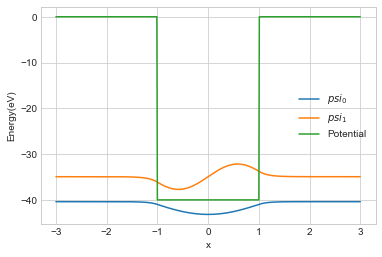

In [19]:
plt.plot(x, 30*(-psi_0) + H_eigenvalues[0], label="$psi_0$")
plt.plot(x, 30*(-psi_1) + H_eigenvalues[1], label ="$psi_1$")
plt.plot(x, potential, label="Potential")

plt.xlabel('x')
plt.ylabel('Energy(eV)')
plt.legend();

In [20]:
psi_0.conj().T # Hermitian adjoint of psi

array([7.19964406e-09, 1.44283696e-08, 2.17153749e-08, 2.90900946e-08,
       3.65823178e-08, 4.42223075e-08, 5.20409245e-08, 6.00697505e-08,
       6.83412163e-08, 7.68887324e-08, 8.57468252e-08, 9.49512753e-08,
       1.04539262e-07, 1.14549513e-07, 1.25022465e-07, 1.36000420e-07,
       1.47527721e-07, 1.59650931e-07, 1.72419019e-07, 1.85883560e-07,
       2.00098939e-07, 2.15122578e-07, 2.31015162e-07, 2.47840885e-07,
       2.65667712e-07, 2.84567650e-07, 3.04617043e-07, 3.25896874e-07,
       3.48493100e-07, 3.72496995e-07, 3.98005516e-07, 4.25121700e-07,
       4.53955078e-07, 4.84622117e-07, 5.17246689e-07, 5.51960575e-07,
       5.88903995e-07, 6.28226175e-07, 6.70085949e-07, 7.14652400e-07,
       7.62105547e-07, 8.12637065e-07, 8.66451068e-07, 9.23764926e-07,
       9.84810146e-07, 1.04983331e-06, 1.11909707e-06, 1.19288119e-06,
       1.27148371e-06, 1.35522214e-06, 1.44443472e-06, 1.53948181e-06,
       1.64074732e-06, 1.74864030e-06, 1.86359656e-06, 1.98608044e-06,
      

In [21]:
np.dot(psi_0.conj().T, psi_0) # Normalization check

1.0

In [22]:
E0 , E1 = H_eigenvalues[0] , H_eigenvalues[1] #DIMENSIONLESS GROUND AND FIRST EXCITED ENERGY STATES RESPECTIVELY
print(E0,E1)

-40.392992463483594 -34.93945809979014


In [23]:
E0 , E1 = E0 * e , E1 * e

In [24]:
print(E0,E1) #GROUND AND FIRST EXCITED ENERGY STATES RESPECTIVELY IN eV

-38.26333331131512 -33.09732826052921


In [ ]:
print(psi_0,psi_1) #GROUND AND FIRST EXCITED EIGEN VECTORS RESPECTIVELY 